# Import necessary libraries

In [54]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset

In [55]:
data = pd.read_csv("C:/Users/Ayaan/Desktop/Obesity Classification.csv")

# 1. Data Exploration

In [44]:
print("Data Info:")
print(data.info())
print("\nSummary Statistics:")
print(data.describe())
print("\nMissing Values:")
print(data.isnull().sum())

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      108 non-null    int64  
 1   Age     108 non-null    int64  
 2   Gender  108 non-null    object 
 3   Height  108 non-null    int64  
 4   Weight  108 non-null    int64  
 5   BMI     108 non-null    float64
 6   Label   108 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 6.0+ KB
None

Summary Statistics:
               ID         Age      Height      Weight         BMI
count  108.000000  108.000000  108.000000  108.000000  108.000000
mean    56.046296   46.555556  166.574074   59.490741   20.549074
std     31.917939   24.720620   27.873615   28.856233    7.583818
min      1.000000   11.000000  120.000000   10.000000    3.900000
25%     28.750000   27.000000  140.000000   35.000000   16.700000
50%     56.500000   42.500000  175.000000   55.000000   21.200000
75

# 2. Cleanse Data (remove ID column)

In [56]:
if 'ID' in data.columns:
    data.drop('ID', axis=1, inplace=True)

# 3. Outlier Detection & Removal using IQR

In [57]:
numeric_cols = data.select_dtypes(include=['number']).columns
Q1 = data[numeric_cols].quantile(0.25)
Q3 = data[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
data_cleaned = data[~((data[numeric_cols] < (Q1 - 1.5 * IQR)) | (data[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

# 4. Convert Categorical to Numerical

In [58]:
label_encoder_gender = LabelEncoder()
data_cleaned['Gender'] = label_encoder_gender.fit_transform(data_cleaned['Gender'])

label_encoder_label = LabelEncoder()
data_cleaned['Label'] = label_encoder_label.fit_transform(data_cleaned['Label'])

C:\Users\Ayaan\AppData\Local\Temp\ipykernel_11600\2848832584.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Gender'] = label_encoder_gender.fit_transform(data_cleaned['Gender'])
C:\Users\Ayaan\AppData\Local\Temp\ipykernel_11600\2848832584.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Label'] = label_encoder_label.fit_transform(data_cleaned['Label'])


# 5. Separate Features and Target

In [60]:
X = data_cleaned.drop('Label', axis=1)
y = data_cleaned['Label']
y = y.astype('int')

# 6. Data Transformation (Standardization)

In [61]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 7. Dimensionality Reduction (PCA)

In [62]:
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

# 8. Data Splitting

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Random forest classifier

In [64]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# ANN (MLP Classifier)

In [65]:
ann_model = MLPClassifier(hidden_layer_sizes=(50, 30), max_iter=1000, random_state=42)
ann_model.fit(X_train, y_train)
y_pred_ann = ann_model.predict(X_test)


# Plot Confusion Matrix Heatmaps

In [66]:
plt.figure(figsize=(14, 6))

<Figure size 1400x600 with 0 Axes>

<Figure size 1400x600 with 0 Axes>

# Random Forest Confusion Matrix

Text(50.722222222222214, 0.5, 'Actual')

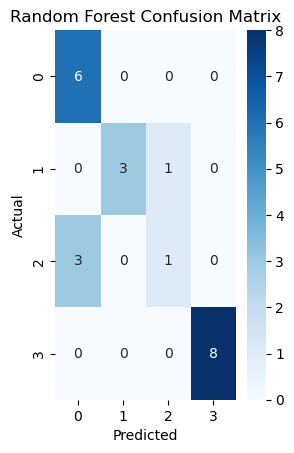

In [67]:
plt.subplot(1, 2, 1)
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# ANN Confusion Matrix

Text(321.26767676767673, 0.5, 'Actual')

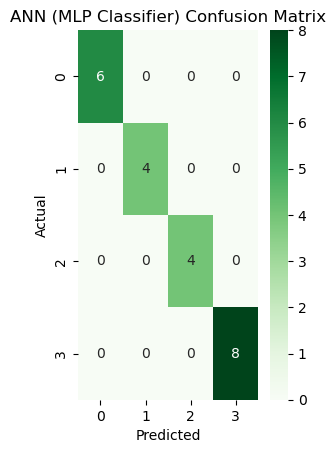

In [68]:
plt.subplot(1, 2, 2)
cm_ann = confusion_matrix(y_test, y_pred_ann)
sns.heatmap(cm_ann, annot=True, fmt='d', cmap='Greens')
plt.title("ANN (MLP Classifier) Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [69]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

# Classification report

In [70]:
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

print("\nANN (MLP Classifier) Classification Report:")
print(classification_report(y_test, y_pred_ann))


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         6
           1       1.00      0.75      0.86         4
           2       0.50      0.25      0.33         4
           3       1.00      1.00      1.00         8

    accuracy                           0.82        22
   macro avg       0.79      0.75      0.75        22
weighted avg       0.82      0.82      0.80        22


ANN (MLP Classifier) Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         8

    accuracy                           1.00        22
   macro avg       1.00      1.00      1.00        22
weighted avg       1.00      1.00      1.00        22

